# **Hate Speech Detection using YouTube Comments**

***Importing the DataSet***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df1 = pd.read_csv('youtoxic_english_1000.csv')
df2 = pd.read_csv("HateSpeechDatasetBalanced.csv")


In [ ]:
df1 = df1[["Text", "IsHatespeech"]]
df1["IsHatespeech"] = df1["IsHatespeech"].astype(int)
df1.head(2)

<ipython-input-3-b8a2874d4bc4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["IsHatespeech"] = df1["IsHatespeech"].astype(int)


,Text,IsHatespeech
0,If only people would just take a step back and...,0
1,Law enforcement is not trained to shoot to app...,0


In [ ]:
df2 = df2.rename(columns={'Content':"Text","Label":"IsHatespeech"})

In [ ]:
combined_df = pd.concat([df2, df1])

combined_df = combined_df.reset_index(drop=True)

combined_df.tail()

,Text,IsHatespeech
105323,I remember that they sent in the national defe...,0.0
105324,Stats don`t represent the problem. Race baitin...,1.0
105325,The quote from the mother... Wow that hit hard...,0.0
105326,this video is so racist,0.0
105327,"God, the narrator has such an annoying lisp.",0.0


In [ ]:
combined_df.groupby("IsHatespeech").count()

,Text
IsHatespeech,
0.0,68445
1.0,36882


In [ ]:
combined_df.to_csv("Final_Dataset.csv")

In [ ]:
df =  pd.read_csv("Final_Dataset.csv")

In [ ]:
df.head()

,Unnamed: 0,Text,IsHatespeech
0,0,denial of normal the con be asked to comment o...,1.0
1,1,just by being able to tweet this insufferable ...,1.0
2,2,that is retarded you too cute to be single tha...,1.0
3,3,thought of a real badass mongol style declarat...,1.0
4,4,afro american basho,1.0


# **Data Cleaning And EDA**

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Remove duplicates
df = df.drop_duplicates()

Unnamed: 0      0
Text            0
IsHatespeech    1
dtype: int64


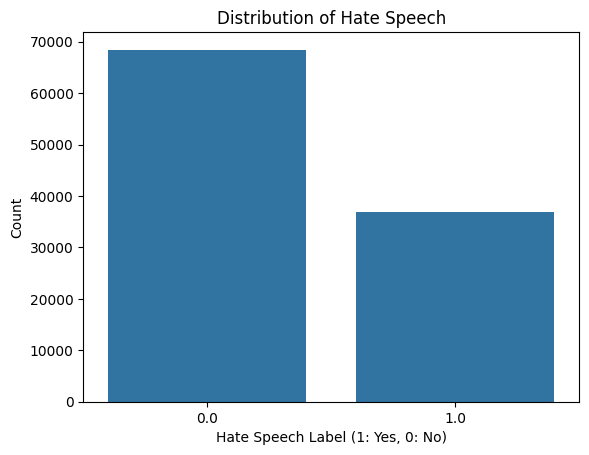

In [ ]:
# Visualize distribution of hate speech
sns.countplot(x='IsHatespeech', data=df)
plt.title("Distribution of Hate Speech")
plt.xlabel("Hate Speech Label (1: Yes, 0: No)")
plt.ylabel("Count")
plt.show()

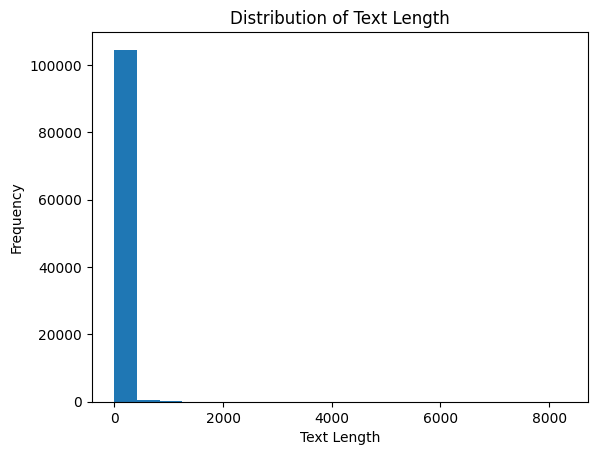

In [ ]:
# Analyze comment length
df['Text_length'] = df['Text'].apply(len)
plt.hist(df['Text_length'], bins=20)
plt.title("Distribution of Text Length")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105328 entries, 0 to 105327
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    105328 non-null  int64  
 1   Text          105328 non-null  object 
 2   IsHatespeech  105327 non-null  float64
 3   Text_length   105328 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 3.2+ MB


In [ ]:
df.describe()

,Unnamed: 0,IsHatespeech,Text_length
count,105328.000000,105327.000000,105328.000000
mean,52663.500000,0.350167,98.343451
std,30405.718914,0.477024,90.025508
min,0.000000,0.000000,1.000000
25%,26331.750000,0.000000,45.000000
50%,52663.500000,0.000000,76.000000
75%,78995.250000,1.000000,124.000000
max,105327.000000,1.000000,8299.000000


# ***Finalized Tokenization and Embedding Technique***
**TF IDF**

In [ ]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

df = pd.read_csv('Preprocessed_cleaned_Final_dataset.csv')
# 1. Tokenize Text (using NLTK)
nltk.download('punkt')


df['clean_text'] = df['clean_text'].astype(str)

df['tokens'] = df['clean_text'].apply(nltk.word_tokenize)

# 2. Join Tokens Back to Strings (required for TfidfVectorizer)
df['tokenized_text'] = df['tokens'].apply(lambda tokens: ' '.join(tokens))

# 3. Create TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# 4. Fit and Transform Text Data
tfidf_vectors = vectorizer.fit_transform(df['tokenized_text'])

# 5. Access TF-IDF Vectors
print(tfidf_vectors.shape)
print(tfidf_vectors[0])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


(9310, 18883)
  (0, 16371)	0.21327532028385762
  (0, 8375)	0.22331939844770585
  (0, 15539)	0.16507193004845175
  (0, 13055)	0.25353772782811773
  (0, 17669)	0.2758041704864419
  (0, 15164)	0.23096093743329466
  (0, 6888)	0.2973463928228995
  (0, 17721)	0.1670692581532512
  (0, 503)	0.2256974053491357
  (0, 18302)	0.13845710005550127
  (0, 18369)	0.2808037224646007
  (0, 12466)	0.3384795610845744
  (0, 9455)	0.20099341532106854
  (0, 8076)	0.1967956289534735
  (0, 6220)	0.172883582651531
  (0, 12521)	0.13716590233482323
  (0, 15341)	0.2256974053491357
  (0, 6610)	0.35366058963129743


# **Observations**

**Data Splitting:**
The dataset is split into 80% training and 20% testing sets, ensuring a good proportion of data for model training and evaluation.

**TF-IDF Vectorization:**
TF-IDF vectorization effectively converts text data into numerical features, limiting to 2500 features to maintain computational efficiency.

**Neural Network Architecture:**The model consists of multiple dense layers with ReLU activation, which helps in learning complex patterns.
Dropout layers are included to prevent overfitting by randomly dropping neurons during training.

**Model Compilation:**
The model is compiled with the Adam optimizer and binary cross-entropy loss, suitable for binary classification tasks.
Metrics such as precision, recall, and accuracy are used for comprehensive performance evaluation.

**Training Process:**Early stopping is utilized to halt training when the validation loss stops improving, preventing overfitting.
Learning rate reduction is employed to fine-tune the learning process when the model's performance plateaus.

**Performance Evaluation:**The model's predictions are evaluated using various metrics including accuracy, AUC-ROC, F1 score, precision, and recall.
A confusion matrix is plotted to visualize the model's performance in distinguishing hate speech from non-hate speech.

**Results:**
The performance metrics and confusion matrix indicate the model's effectiveness in detecting hate speech.
The use of TF-IDF features and a well-structured neural network contributes to robust performance in this classification task.

**Accuracy:0.7690655209452202**

**F1 Score: 0.7675675675675676**

**Precision: 0.7700650759219089**

**Recall: 0.7650862068965517**

Training Dataset shape : (7448,)
Test Dataset shape : (1862,)
Epoch 1/40
117/117 - 9s - loss: 0.5539 - precision: 0.6696 - recall: 0.7922 - accuracy: 0.7080 - val_loss: 0.4641 - val_precision: 0.7701 - val_recall: 0.7651 - val_accuracy: 0.7691 - lr: 0.0010 - 9s/epoch - 80ms/step
Epoch 2/40
117/117 - 6s - loss: 0.3342 - precision: 0.8364 - recall: 0.8863 - accuracy: 0.8600 - val_loss: 0.5166 - val_precision: 0.7208 - val_recall: 0.8373 - val_accuracy: 0.7573 - lr: 0.0010 - 6s/epoch - 49ms/step
Epoch 3/40
117/117 - 5s - loss: 0.1472 - precision: 0.9341 - recall: 0.9524 - accuracy: 0.9440 - val_loss: 0.7593 - val_precision: 0.7487 - val_recall: 0.7737 - val_accuracy: 0.7578 - lr: 0.0010 - 5s/epoch - 45ms/step
Epoch 4/40
117/117 - 6s - loss: 0.0495 - precision: 0.9831 - recall: 0.9788 - accuracy: 0.9815 - val_loss: 1.1691 - val_precision: 0.7591 - val_recall: 0.7877 - val_accuracy: 0.7696 - lr: 0.0010 - 6s/epoch - 54ms/step
59/59 [==============================] - 1s 8ms/step
Deep Learning

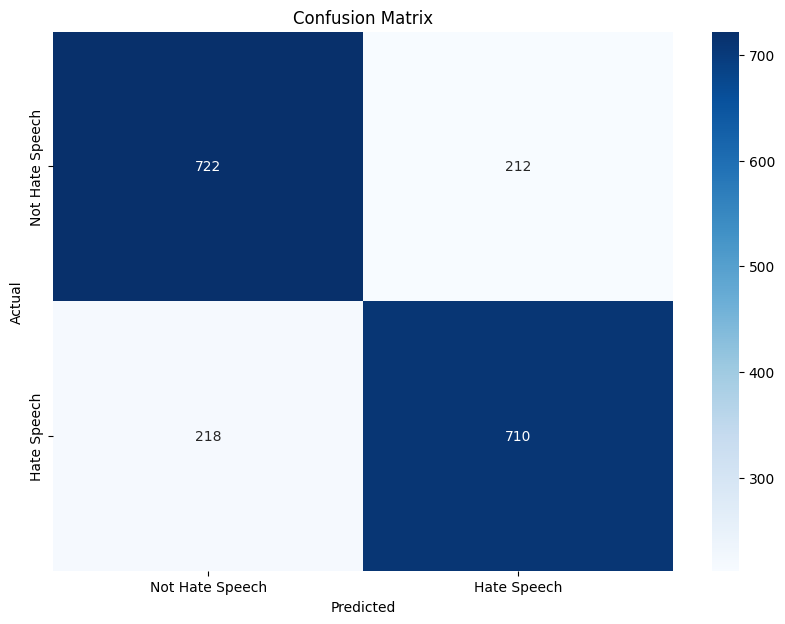

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix, f1_score, precision_score, recall_score
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv('Preprocessed_cleaned_Final_dataset.csv')

X = df['clean_text']
y = df['IsHatespeech']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Dataset shape :",X_train.shape)
print("Test Dataset shape :",X_test.shape)
X_train = X_train.fillna('')
X_test = X_test.fillna('')

tfidf_vectorizer = TfidfVectorizer(max_features=2500)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = tfidf_vectorizer.transform(X_test).toarray()

y_train = y_train.values.astype(np.float32)
y_test = y_test.values.astype(np.float32)

model = Sequential()
model.add(Dense(1024, input_dim=X_train_tfidf.shape[1], activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=[ tf.keras.metrics.Precision(), tf.keras.metrics.Recall(),'accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0005)


history = model.fit(X_train_tfidf, y_train, epochs=40, batch_size=64, validation_data=(X_test_tfidf, y_test), verbose=2, callbacks=[early_stopping, reduce_lr])

y_pred_prob = model.predict(X_test_tfidf)
y_pred = (y_pred_prob > 0.5).astype("int32").flatten()

print("Deep Learning Model Performance with TF-IDF:")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=['Not Hate Speech', 'Hate Speech'], yticklabels=['Not Hate Speech', 'Hate Speech'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
def preprocess_text(text):
    # Includes a function which contained all the datacleaning shown above in the notebook
    return text

def predict_hate_speech(text):
    preprocessed_text = preprocess_text(text)
    text_tfidf = tfidf_vectorizer.transform([preprocessed_text]).toarray()
    prediction_prob = model.predict(text_tfidf)
    text_tfidf
    prediction = (prediction_prob > 0.5).astype("int32").flatten()
    return "Hate Speech" if prediction[0] == 1 else "Not Hate Speech"

sample_texts = [
    "the sun is bright today",
    "hahaha gnaa screw ass hell vandal rule",
    "driving that bmw is best experience",
    "boy scout boy dog scout faggot bet anything would like mormon semen white face",
    "fuck gone",
    "sorry loss u",
    "oh close english mean cool k would critical satirical newspaper column accurate thanks",
    "Karim, fuck you",

]

for text in sample_texts:
    print(f"Text: {text}")
    print(f"Prediction: {predict_hate_speech(text)}")
    print()

Text: the sun is bright today
1/1 [==============================] - 0s 78ms/step
Prediction: Not Hate Speech

Text: hahaha gnaa screw ass hell vandal rule
1/1 [==============================] - 0s 45ms/step
Prediction: Hate Speech

Text: driving that bmw is best experience
1/1 [==============================] - 0s 35ms/step
Prediction: Not Hate Speech

Text: boy scout boy dog scout faggot bet anything would like mormon semen white face
1/1 [==============================] - 0s 33ms/step
Prediction: Hate Speech

Text: fuck gone
1/1 [==============================] - 0s 43ms/step
Prediction: Hate Speech

Text: sorry loss u
1/1 [==============================] - 0s 35ms/step
Prediction: Not Hate Speech

Text: oh close english mean cool k would critical satirical newspaper column accurate thanks
1/1 [==============================] - 0s 44ms/step
Prediction: Not Hate Speech

Text: Karim, fuck you
1/1 [==============================] - 0s 84ms/step
Prediction: Hate Speech



In [ ]:
import pickle

with open('tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(tfidf_vectorizer, file)

with open('Hatespeech_Model.pkl', 'wb') as file:
    pickle.dump(model, file)